In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
#import the countries data from the csv file with an index column of countries
df_jan_updated = pd.read_csv("Jan23_Feb7_data.csv")
#timestamp column to datetime 
df_jan_updated['timestamp'] = pd.to_datetime(df_jan_updated['timestamp'])
df_jan_updated = df_jan_updated.resample('H', on ='timestamp', axis=0).sum()
df_jan_updated.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_14680\4249275251.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_jan_updated = df_jan_updated.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_14680\4249275251.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_jan_updated = df_jan_updated.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-01-23 14:00:00,579,417,664
2024-01-23 15:00:00,2824,1939,3005
2024-01-23 16:00:00,2811,1970,3044
2024-01-23 17:00:00,2727,1934,2977
2024-01-23 18:00:00,2741,1956,2989


In [11]:
df_jan_updated["Chan_0_1_pct"] = ((df_jan_updated['Chan_0_1'] - df_jan_updated['Chan_0_1'].mean())/ 
                      df_jan_updated['Chan_0_1'].mean()*100)
df_jan_updated["Chan_0_2_pct"] = ((df_jan_updated['Chan_0_2'] - df_jan_updated['Chan_0_2'].mean())/ 
                      df_jan_updated['Chan_0_2'].mean()*100)
df_jan_updated["Chan_1_2_pct"] = ((df_jan_updated['Chan_1_2'] - df_jan_updated['Chan_1_2'].mean())/ 
                      df_jan_updated['Chan_1_2'].mean()*100)
df_jan_updated["Chan_0_1_m_avg"] = df_jan_updated.rolling('12H').Chan_0_1_pct.mean()
df_jan_updated["Chan_0_2_m_avg"] = df_jan_updated.rolling('12H').Chan_0_2_pct.mean()
df_jan_updated["Chan_1_2_m_avg"] = df_jan_updated.rolling('12H').Chan_1_2_pct.mean()

#df_jan_updated.head()

#remove first and last line of data
df_jan_updated = df_jan_updated.iloc[1:]
df_jan_updated = df_jan_updated.iloc[:-1]

df_jan_updated.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_14680\3432897355.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_jan_updated["Chan_0_1_m_avg"] = df_jan_updated.rolling('12H').Chan_0_1_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_14680\3432897355.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_jan_updated["Chan_0_2_m_avg"] = df_jan_updated.rolling('12H').Chan_0_2_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_14680\3432897355.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_jan_updated["Chan_1_2_m_avg"] = df_jan_updated.rolling('12H').Chan_1_2_pct.mean()


,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg
timestamp,,,,,,,,,
2024-01-23 17:00:00,2727,1934,2977,-5.146994,-3.422413,-3.019140,-3.686112,-2.523552,-1.927820
2024-01-23 18:00:00,2741,1956,2989,-4.660034,-2.323805,-2.628219,-4.010752,-2.456970,-2.161287
2024-01-23 19:00:00,2724,1959,2925,-5.251343,-2.173995,-4.713129,-4.320900,-2.386226,-2.799247
2024-01-23 20:00:00,2724,1975,3004,-5.251343,-1.375008,-2.139569,-4.506989,-2.183982,-2.667312
2024-01-23 21:00:00,2797,1942,2958,-2.712190,-3.022919,-3.638097,-4.207856,-2.323805,-2.829109


weather data

In [15]:
df_weather = pd.read_csv("AW_Jan22_Feb7.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_jan_updated, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_14680\2789145036.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather = df_weather.resample('H').sum()


,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Daily_Rain,Weekly_Rain,Monthly_Rain,Total_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Absolute_Pressure,CO2_battery
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-23 17:00:00,2727.0,1934.0,2977.0,-5.146994,-3.422413,-3.019140,-3.686112,-2.523552,-1.927820,609.5,...,0.72,0.72,63.96,863.04,363.16,1025,0,142.0,351.59,12
2024-01-23 18:00:00,2741.0,1956.0,2989.0,-4.660034,-2.323805,-2.628219,-4.010752,-2.456970,-2.161287,600.8,...,0.72,0.72,63.96,863.04,363.20,1042,0,2.1,351.64,12
2024-01-23 19:00:00,2724.0,1959.0,2925.0,-5.251343,-2.173995,-4.713129,-4.320900,-2.386226,-2.799247,595.1,...,0.72,0.72,63.96,863.04,363.23,1049,0,0.0,351.66,12
2024-01-23 20:00:00,2724.0,1975.0,3004.0,-5.251343,-1.375008,-2.139569,-4.506989,-2.183982,-2.667312,591.0,...,0.72,0.72,63.96,863.04,363.32,1078,0,0.0,351.74,12
2024-01-23 21:00:00,2797.0,1942.0,2958.0,-2.712190,-3.022919,-3.638097,-4.207856,-2.323805,-2.829109,578.6,...,0.72,0.72,63.96,863.04,363.48,1127,0,0.0,351.90,12


In [17]:
#scale temperature by the percent change
df_combined['Temperature_F_pct'] = ((df_combined['Outdoor_Temperature'] - df_combined['Outdoor_Temperature'].mean())/ 
                      df_combined['Outdoor_Temperature'].mean()*100)
#scale by 0.1
df_combined['Temperature_F_pct'] = df_combined['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined['Relative_Pressure_pct'] = ((df_combined['Relative_Pressure_(inHg)'] - df_combined['Relative_Pressure_(inHg)'].mean())/ 
                      df_combined['Relative_Pressure_(inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined['Relative_Pressure_pct'] = df_combined['Relative_Pressure_pct'] * 2

#filter any Relative_Pressure_pct values that are less than -10 and replace them with average
#df_combined['Relative_Pressure_pct'] = df_combined['Relative_Pressure_pct'].mask(df_combined['Relative_Pressure_pct'] < -10, df_combined['Relative_Pressure_pct'].mean())

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined['Relative_Pressure_pct'] = df_combined['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined['Relative_Pressure_pct'].mean())

df_combined.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Outdoor_Temperature,...,Monthly_Rain,Total_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Absolute_Pressure,CO2_battery,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-23 17:00:00,2727.0,1934.0,2977.0,-5.146994,-3.422413,-3.019140,-3.686112,-2.523552,-1.927820,609.5,...,63.96,863.04,363.16,1025,0,142.0,351.59,12,0.032447,2.370204
2024-01-23 18:00:00,2741.0,1956.0,2989.0,-4.660034,-2.323805,-2.628219,-4.010752,-2.456970,-2.161287,600.8,...,63.96,863.04,363.20,1042,0,2.1,351.64,12,-0.110756,2.392494
2024-01-23 19:00:00,2724.0,1959.0,2925.0,-5.251343,-2.173995,-4.713129,-4.320900,-2.386226,-2.799247,595.1,...,63.96,863.04,363.23,1049,0,0.0,351.66,12,-0.204579,2.409211
2024-01-23 20:00:00,2724.0,1975.0,3004.0,-5.251343,-1.375008,-2.139569,-4.506989,-2.183982,-2.667312,591.0,...,63.96,863.04,363.32,1078,0,0.0,351.74,12,-0.272065,2.459363
2024-01-23 21:00:00,2797.0,1942.0,2958.0,-2.712190,-3.022919,-3.638097,-4.207856,-2.323805,-2.829109,578.6,...,63.96,863.04,363.48,1127,0,0.0,351.90,12,-0.476171,2.548523


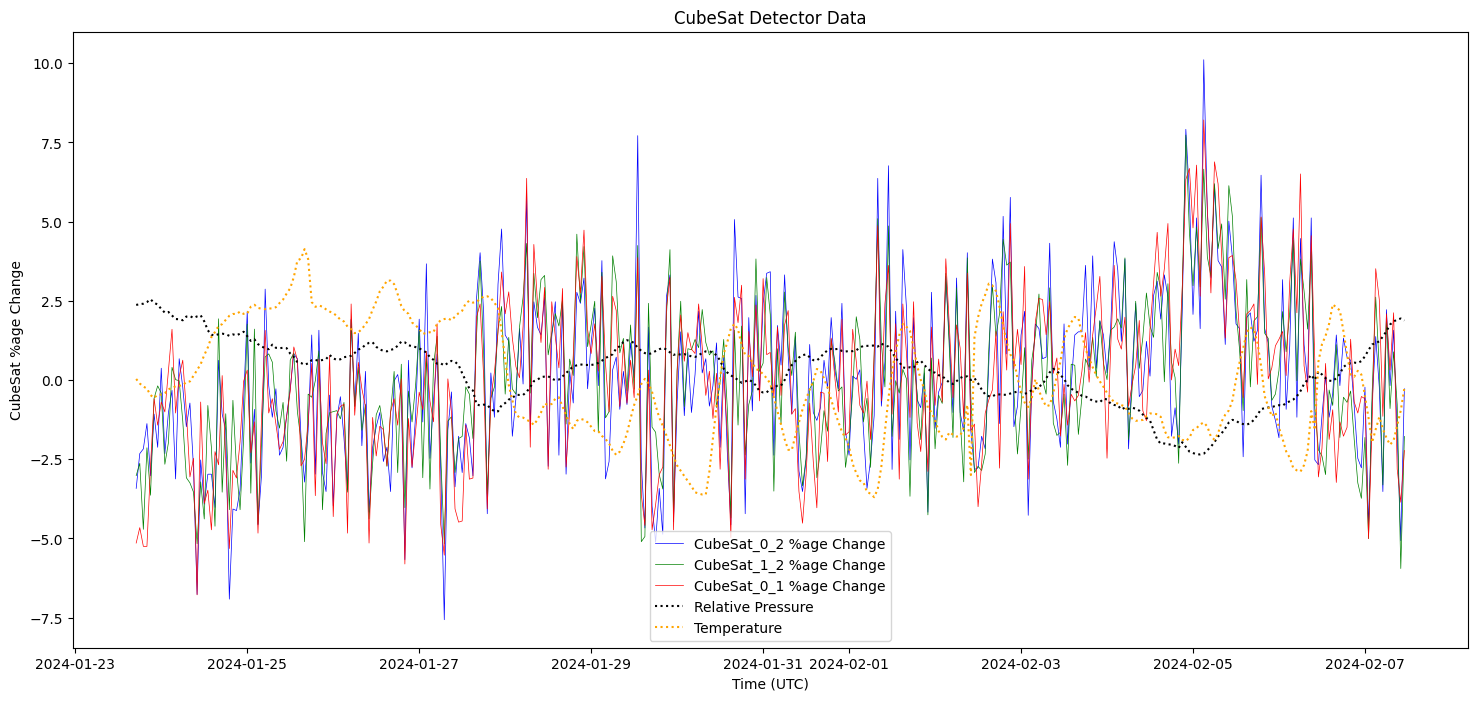

In [20]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_combined["Chan_0_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='blue', label='CubeSat_0_2 %age Change')
#ax6.plot(df_combined["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax6.plot(df_combined["Chan_1_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_combined["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax6.plot(df_combined["Chan_0_1_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_combined["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined.index, df_combined['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')
ax6.plot(df_combined.index, df_combined['Temperature_F_pct'], color='orange',linestyle='dotted', label='Temperature')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data')
ax6.legend(loc='lower center')

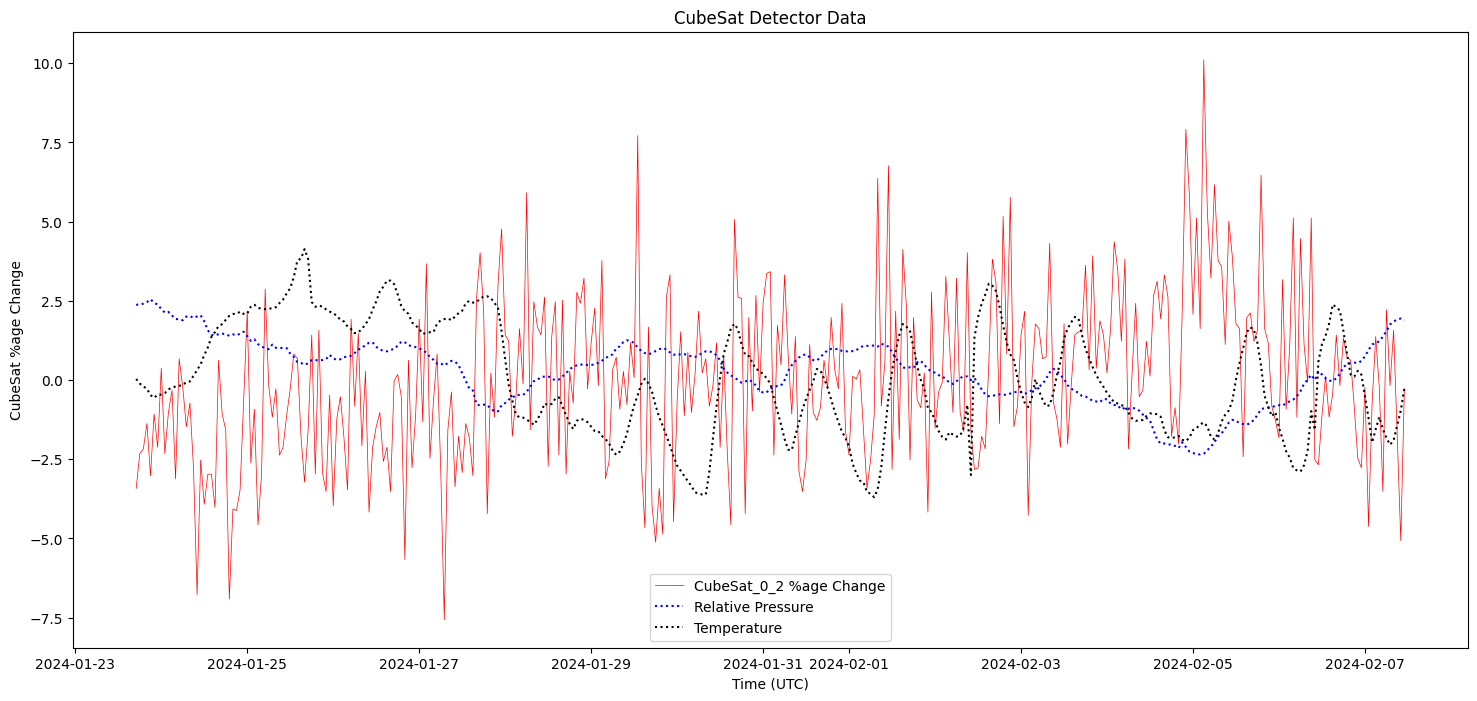

In [22]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_combined["Chan_0_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_2 %age Change')
#ax6.plot(df_combined["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
#ax6.plot(df_combined["Chan_1_2_pct"], #marker='o', markersize=3,          linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_combined["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
#ax6.plot(df_combined["Chan_0_1_pct"], #marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_combined["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined.index, df_combined['Relative_Pressure_pct'], color='blue',linestyle='dotted', label='Relative Pressure')
ax6.plot(df_combined.index, df_combined['Temperature_F_pct'], color='black',linestyle='dotted', label='Temperature')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data')
ax6.legend(loc='lower center')